In [152]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy as st
from scipy.stats import linegress
import numpy as np


ImportError: cannot import name 'linegress' from 'scipy.stats' (C:\Users\secar\anaconda3\Lib\site-packages\scipy\stats\__init__.py)

In [ ]:
songs_path = "C:/Users/secar/OneDrive/Documents/Bootcamp/spotify_songs.csv"
song_data = pd.read_csv(songs_path)
song_data.head()

In [ ]:
date_filtered_df = song_data.loc[song_data["track_album_release_date"].str.len() > 9]
date_filtered_df.head()

In [ ]:


count = date_filtered_df.info()
count

In [ ]:
cleaned_song_data = date_filtered_df.dropna()
cleaned_song_data.info()

In [ ]:
cleaned_song_data['track_album_release_date'] = pd.to_datetime(cleaned_song_data['track_album_release_date'])
cleaned_song_data = cleaned_song_data.loc[(cleaned_song_data["track_album_release_date"] >= "2010-01-01") & (cleaned_song_data["track_album_release_date"] < "2020-01-01")]


In [ ]:
cleaned_song_data.info()

In [ ]:
cleaned_song_data['track_name'].value_counts()

In [ ]:
cleaned_song_data['track_id'].nunique()


In [171]:
cleaned_track_data = cleaned_song_data.drop_duplicates(subset =['track_id'])
cleaned_trackid_data = cleaned_song_data.drop_duplicates(subset=['track_name', 'track_artist'], keep = False)
cleaned_trackid_data.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


In [208]:

cleaned_trackid_data.info()
file_path = "C:/Users/secar/OneDrive/Documents/Bootcamp/cleaned_trackid_data.csv"
cleaned_trackid_data.to_csv(cleaned_trackid_data, index=False)

<class 'pandas.core.frame.DataFrame'>
Index: 17851 entries, 0 to 32832
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   track_id                  17851 non-null  object        
 1   track_name                17851 non-null  object        
 2   track_artist              17851 non-null  object        
 3   track_popularity          17851 non-null  int64         
 4   track_album_id            17851 non-null  object        
 5   track_album_name          17851 non-null  object        
 6   track_album_release_date  17851 non-null  datetime64[ns]
 7   playlist_name             17851 non-null  object        
 8   playlist_id               17851 non-null  object        
 9   playlist_genre            17851 non-null  object        
 10  playlist_subgenre         17851 non-null  object        
 11  danceability              17851 non-null  float64       
 12  energy                 

TypeError: argument of type 'method' is not iterable

In [209]:
cleaned_trackid_data['playlist_name'].value_counts()

playlist_name
Indie Poptimism                                      264
Hard Rock Workout                                    153
Urban Contemporary                                   135
Tropical Vibes                                       111
Lush Lofi                                            100
                                                    ... 
90s R&B - The BET Planet Groove/Midnight Love Mix      1
The Sound of New Jack Swing                            1
Rock Classics                                          1
90's Gangster Rap                                      1
New Jack Swing - 90s R&B fused w Hip Hop               1
Name: count, Length: 436, dtype: int64

In [210]:
cleaned_trackid_data['playlist_name'].nunique()

436

In [211]:
column_name = 'speechiness'
for index, row in cleaned_trackid_data.iterrows():
    column_values = cleaned_trackid_data[column_name]
    max_value = column_values.max()
    min_value = column_values.min()
    avg_value = column_values.mean()

print(f"Row {index}: Max = {max_value}, Min = {min_value}, Average = {avg_value}")

Row 32832: Max = 0.918, Min = 0.023, Average = 0.11189461654809255


In [153]:
column_name = 'acousticness'
for index, row in cleaned_trackid_data.iterrows():
    column_values = cleaned_trackid_data[column_name]
    max_value = column_values.max()
    min_value = column_values.min()
    avg_value = column_values.mean()

print(f"Row {index}: Max = {max_value}, Min = {min_value}, Average = {avg_value}")

Row 32832: Max = 0.992, Min = 1.44e-06, Average = 0.18217651925775183


In [154]:

column_name = 'instrumentalness'
for index, row in cleaned_trackid_data.iterrows():
    column_values = cleaned_trackid_data[column_name]
    max_value = column_values.max()
    min_value = column_values.min()
    avg_value = column_values.mean()

print(f"Row {index}: Max = {max_value}, Min = {min_value}, Average = {avg_value}")

Row 32832: Max = 0.994, Min = 0.0, Average = 0.11223727849568896


In [155]:
column_name = 'liveness'
for index, row in cleaned_trackid_data.iterrows():
    column_values = cleaned_trackid_data[column_name]
    max_value = column_values.max()
    min_value = column_values.min()
    avg_value = column_values.mean()

print(f"Row {index}: Max = {max_value}, Min = {min_value}, Average = {avg_value}")

Row 32832: Max = 0.991, Min = 0.00936, Average = 0.18863541584105395


In [156]:
column_name = 'valence'
for index, row in cleaned_trackid_data.iterrows():
    column_values = cleaned_song_data[column_name]
    max_value = column_values.max()
    min_value = column_values.min()
    avg_value = column_values.mean()

print(f"Row {index}: Max = {max_value}, Min = {min_value}, Average = {avg_value}")

Row 32832: Max = 0.98, Min = 1e-05, Average = 0.4735222202405218


In [157]:
column_name = 'tempo'
for index, row in cleaned_trackid_data.iterrows():
    column_values = cleaned_trackid_data[column_name]
    max_value = column_values.max()
    min_value = column_values.min()
    avg_value = column_values.mean()

print(f"Row {index}: Max = {max_value}, Min = {min_value}, Average = {avg_value}")

Row 32832: Max = 239.44, Min = 35.477, Average = 121.6457217372677


In [158]:
column_name = 'duration_ms'
for index, row in cleaned_trackid_data.iterrows():
    column_values = cleaned_trackid_data[column_name]
    max_value = column_values.max()
    min_value = column_values.min()
    avg_value = column_values.mean()

print(f"Row {index}: Max = {max_value}, Min = {min_value}, Average = {avg_value}")

Row 32832: Max = 517810, Min = 31429, Average = 215759.90783484175


In [159]:
def print_unique_values(cleaned_trackid_data, playlist_genre):
    unique_values = cleaned_trackid_data['playlist_genre'].unique()
    for value in unique_values:
        print(value)


In [160]:
edm_genre = 'edm'
latin_genre = "latin"
pop_genre = 'pop'
rnb_genre = "r&b"
rap_genre = "rap"
rock_genre = "rock"

In [161]:
edm_df = cleaned_trackid_data[cleaned_trackid_data["playlist_genre"]==edm_genre]
latin_df = cleaned_trackid_data[cleaned_trackid_data["playlist_genre"]==latin_genre]
pop_df = cleaned_trackid_data[cleaned_trackid_data["playlist_genre"]==pop_genre]
rnb_df = cleaned_trackid_data[cleaned_trackid_data["playlist_genre"]==rnb_genre]
rap_df = cleaned_trackid_data[cleaned_trackid_data["playlist_genre"]==rap_genre]
rock_df = cleaned_trackid_data[cleaned_trackid_data["playlist_genre"]==rock_genre]

In [179]:
edm_df['Year'] = edm_df['track_album_release_date'].dt.year
edm_df_filtered = edm_df[edm_df['Year'].between(2010, 2019)]
edm_average_speechiness_per_year = edm_df_filtered.groupby('Year')['speechiness'].mean()
print(edm_average_valence_per_year)

edm_df['Year'] = edm_df['track_album_release_date'].dt.year
edm_df_filtered = edm_df[edm_df['Year'].between(2010, 2019)]
edm_average_acousticness_per_year = edm_df_filtered.groupby('Year')['acousticness'].mean()
print(edm_average_acousticness_per_year)

edm_df['Year'] = edm_df['track_album_release_date'].dt.year
edm_df_filtered = edm_df[edm_df['Year'].between(2010, 2019)]
edm_average_valence_per_year = edm_df_filtered.groupby('Year')['valence'].mean()
print(edm_average_valence_per_year)

edm_df['Year'] = edm_df['track_album_release_date'].dt.year
edm_df_filtered = edm_df[edm_df['Year'].between(2010, 2019)]
edm_average_instrumentalness_per_year = edm_df_filtered.groupby('Year')['instrumentalness'].mean()
print(edm_average_instrumentalness_per_year)

edm_df['Year'] = edm_df['track_album_release_date'].dt.year
edm_df_filtered = edm_df[edm_df['Year'].between(2010, 2019)]
edm_average_liveness_per_year = edm_df_filtered.groupby('Year')['liveness'].mean()
print(edm_average_liveness_per_year)

edm_df['Year'] = edm_df['track_album_release_date'].dt.year
edm_df_filtered = edm_df[edm_df['Year'].between(2010, 2019)]
edm_average_tempo_per_year = edm_df_filtered.groupby('Year')['tempo'].mean()
print(edm_average_tempo_per_year)

Year
2010    0.311566
2011    0.371609
2012    0.298185
2013    0.346087
2014    0.296351
2015    0.203300
2016    0.178403
2017    0.189502
2018    0.282068
2019    0.249334
Name: instrumentalness, dtype: float64
Year
2010    0.057074
2011    0.066637
2012    0.047048
2013    0.031920
2014    0.032896
2015    0.058474
2016    0.068435
2017    0.091030
2018    0.099563
2019    0.090412
Name: acousticness, dtype: float64
Year
2010    0.514756
2011    0.449442
2012    0.445996
2013    0.346124
2014    0.330591
2015    0.373251
2016    0.387603
2017    0.403246
2018    0.401930
2019    0.397479
Name: valence, dtype: float64
Year
2010    0.311566
2011    0.371609
2012    0.298185
2013    0.346087
2014    0.296351
2015    0.203300
2016    0.178403
2017    0.189502
2018    0.282068
2019    0.249334
Name: instrumentalness, dtype: float64
Year
2010    0.227940
2011    0.251418
2012    0.224040
2013    0.217334
2014    0.220872
2015    0.205052
2016    0.215304
2017    0.194687
2018    0.196721

In [180]:
latin_df['Year'] = latin_df['track_album_release_date'].dt.year
latin_df_filtered = latin_df[latin_df['Year'].between(2010, 2019)]
latin_average_valence_per_year = latin_df_filtered.groupby('Year')['valence'].mean()
print(latin_average_valence_per_year)

latin_df['Year'] = latin_df['track_album_release_date'].dt.year
latin_df_filtered = latin_df[latin_df['Year'].between(2010, 2019)]
latin_average_speechiness_per_year = latin_df_filtered.groupby('Year')['speechiness'].mean()
print(latin_average_speechiness_per_year)

latin_df['Year'] = latin_df['track_album_release_date'].dt.year
latin_df_filtered = latin_df[latin_df['Year'].between(2010, 2019)]
latin_average_acousticness_per_year = latin_df_filtered.groupby('Year')['acousticness'].mean()
print(latin_average_acousticness_per_year)

latin_df['Year'] = latin_df['track_album_release_date'].dt.year
latin_df_filtered = latin_df[latin_df['Year'].between(2010, 2019)]
latin_average_instrumentalness_per_year = latin_df_filtered.groupby('Year')['instrumentalness'].mean()
print(latin_average_instrumentalness_per_year)

latin_df['Year'] = latin_df['track_album_release_date'].dt.year
latin_df_filtered = latin_df[latin_df['Year'].between(2010, 2019)]
latin_average_liveness_per_year = latin_df_filtered.groupby('Year')['liveness'].mean()
print(latin_average_liveness_per_year)

latin_df['Year'] = latin_df['track_album_release_date'].dt.year
latin_df_filtered = latin_df[latin_df['Year'].between(2010, 2019)]
latin_average_tempo_per_year = latin_df_filtered.groupby('Year')['tempo'].mean()
print(latin_average_tempo_per_year)

#latin_df['Year'] = latin_df['track_album_release_date'].dt.year
#latin_df_filtered = latin_df[latin_df['Year'].between(2010, 2020)]
#latin_average_valence_per_year = latin_df_filtered.groupby('Year')['valence'].mean()
#print(latin_average_valence_per_year)


Year
2010    0.712084
2011    0.666204
2012    0.648226
2013    0.595865
2014    0.609343
2015    0.580907
2016    0.541051
2017    0.550266
2018    0.586128
2019    0.587517
Name: valence, dtype: float64
Year
2010    0.088442
2011    0.084657
2012    0.108567
2013    0.084887
2014    0.087088
2015    0.100339
2016    0.104423
2017    0.098786
2018    0.104589
2019    0.106260
Name: speechiness, dtype: float64
Year
2010    0.178226
2011    0.195618
2012    0.243655
2013    0.191971
2014    0.191583
2015    0.194785
2016    0.175160
2017    0.185283
2018    0.231000
2019    0.248993
Name: acousticness, dtype: float64
Year
2010    0.010515
2011    0.047742
2012    0.032398
2013    0.073272
2014    0.111118
2015    0.051411
2016    0.059982
2017    0.064892
2018    0.103380
2019    0.053776
Name: instrumentalness, dtype: float64
Year
2010    0.193183
2011    0.239059
2012    0.236880
2013    0.215040
2014    0.184958
2015    0.190142
2016    0.175534
2017    0.179048
2018    0.171511
2019

In [181]:
pop_df['Year'] = pop_df['track_album_release_date'].dt.year
pop_df_filtered = pop_df[pop_df['Year'].between(2010, 2019)]
pop_average_valence_per_year = pop_df_filtered.groupby('Year')['valence'].mean()
print(pop_average_valence_per_year)

pop_df['Year'] = pop_df['track_album_release_date'].dt.year
pop_df_filtered = pop_df[pop_df['Year'].between(2010, 2019)]
pop_average_speechiness_per_year = pop_df_filtered.groupby('Year')['speechiness'].mean()
print(pop_average_speechiness_per_year)

pop_df['Year'] = pop_df['track_album_release_date'].dt.year
pop_df_filtered = pop_df[pop_df['Year'].between(2010, 2019)]
pop_average_acousticness_per_year = pop_df_filtered.groupby('Year')['acousticness'].mean()
print(pop_average_acousticness_per_year)

pop_df['Year'] = pop_df['track_album_release_date'].dt.year
pop_df_filtered = pop_df[pop_df['Year'].between(2010, 2019)]
pop_average_liveness_per_year = pop_df_filtered.groupby('Year')['liveness'].mean()
print(pop_average_liveness_per_year)

pop_df['Year'] = pop_df['track_album_release_date'].dt.year
pop_df_filtered = pop_df[pop_df['Year'].between(2010, 2019)]
pop_average_tempo_per_year = pop_df_filtered.groupby('Year')['tempo'].mean()
print(pop_average_tempo_per_year)

pop_df['Year'] = pop_df['track_album_release_date'].dt.year
pop_df_filtered = pop_df[pop_df['Year'].between(2010, 2019)]
pop_average_instrumentalness_per_year = pop_df_filtered.groupby('Year')['instrumentalness'].mean()
print(pop_average_instrumentalness_per_year)

Year
2010    0.601945
2011    0.530594
2012    0.528689
2013    0.526373
2014    0.485144
2015    0.454785
2016    0.446195
2017    0.480856
2018    0.469814
2019    0.484738
Name: valence, dtype: float64
Year
2010    0.073095
2011    0.070067
2012    0.068510
2013    0.071936
2014    0.064930
2015    0.069211
2016    0.073630
2017    0.077175
2018    0.078811
2019    0.084015
Name: speechiness, dtype: float64
Year
2010    0.109068
2011    0.137746
2012    0.104412
2013    0.123870
2014    0.136371
2015    0.180798
2016    0.217516
2017    0.193547
2018    0.186247
2019    0.193232
Name: acousticness, dtype: float64
Year
2010    0.179675
2011    0.173344
2012    0.172771
2013    0.183970
2014    0.180456
2015    0.164394
2016    0.182665
2017    0.177949
2018    0.168798
2019    0.173243
Name: liveness, dtype: float64
Year
2010    127.658313
2011    125.156991
2012    121.374399
2013    123.154523
2014    122.784795
2015    120.083386
2016    117.340784
2017    118.237616
2018    117.5

In [182]:
rnb_df['Year'] = rnb_df['track_album_release_date'].dt.year
rnb_df_filtered = rnb_df[rnb_df['Year'].between(2010, 2019)]
rnb_average_valence_per_year = rnb_df_filtered.groupby('Year')['valence'].mean()
print(rnb_average_valence_per_year)

rnb_df['Year'] = rnb_df['track_album_release_date'].dt.year
rnb_df_filtered = rnb_df[rnb_df['Year'].between(2010, 2019)]
rnb_average_speechiness_per_year = rnb_df_filtered.groupby('Year')['speechiness'].mean()
print(rnb_average_speechiness_per_year)

rnb_df['Year'] = rnb_df['track_album_release_date'].dt.year
rnb_df_filtered = rnb_df[rnb_df['Year'].between(2010, 2019)]
rnb_average_acousticness_per_year = rnb_df_filtered.groupby('Year')['acousticness'].mean()
print(rnb_average_acousticness_per_year)

rnb_df['Year'] = rnb_df['track_album_release_date'].dt.year
rnb_df_filtered = rnb_df[rnb_df['Year'].between(2010, 2019)]
rnb_average_liveness_per_year = rnb_df_filtered.groupby('Year')['liveness'].mean()
print(rnb_average_liveness_per_year)

rnb_df['Year'] = rnb_df['track_album_release_date'].dt.year
rnb_df_filtered = rnb_df[rnb_df['Year'].between(2010, 2019)]
rnb_average_tempo_per_year = rnb_df_filtered.groupby('Year')['tempo'].mean()
print(rnb_average_tempo_per_year)

rnb_df['Year'] = rnb_df['track_album_release_date'].dt.year
rnb_df_filtered = rnb_df[rnb_df['Year'].between(2010, 2019)]
rnb_average_instrumentalness_per_year = rnb_df_filtered.groupby('Year')['instrumentalness'].mean()
print(rnb_average_instrumentalness_per_year)



Year
2010    0.567477
2011    0.555906
2012    0.515520
2013    0.520919
2014    0.537791
2015    0.470748
2016    0.472102
2017    0.428011
2018    0.445839
2019    0.481646
Name: valence, dtype: float64
Year
2010    0.087411
2011    0.106537
2012    0.115144
2013    0.120651
2014    0.125254
2015    0.130997
2016    0.152363
2017    0.149975
2018    0.129595
2019    0.128806
Name: speechiness, dtype: float64
Year
2010    0.257752
2011    0.275990
2012    0.328290
2013    0.314411
2014    0.238598
2015    0.291894
2016    0.299080
2017    0.311077
2018    0.371536
2019    0.280747
Name: acousticness, dtype: float64
Year
2010    0.171089
2011    0.197316
2012    0.184192
2013    0.176420
2014    0.186162
2015    0.192484
2016    0.196289
2017    0.173098
2018    0.165582
2019    0.165252
Name: liveness, dtype: float64
Year
2010    120.633031
2011    116.140860
2012    111.039327
2013    116.539124
2014    117.655533
2015    113.023985
2016    116.538736
2017    114.769234
2018    114.1

In [183]:
rap_df['Year'] = rap_df['track_album_release_date'].dt.year
rap_df_filtered = rap_df[rap_df['Year'].between(2010, 2019)]
rap_average_valence_per_year = rap_df_filtered.groupby('Year')['valence'].mean()
print(rap_average_valence_per_year)

rap_df['Year'] = rap_df['track_album_release_date'].dt.year
rap_df_filtered = rap_df[rap_df['Year'].between(2010, 2019)]
rap_average_speechiness_per_year = rap_df_filtered.groupby('Year')['speechiness'].mean()
print(rap_average_speechiness_per_year)

rap_df['Year'] = rap_df['track_album_release_date'].dt.year
rap_df_filtered = rap_df[rap_df['Year'].between(2010, 2019)]
rap_average_acousticness_per_year = rap_df_filtered.groupby('Year')['acousticness'].mean()
print(rap_average_acousticness_per_year)

rap_df['Year'] = rap_df['track_album_release_date'].dt.year
rap_df_filtered = rap_df[rap_df['Year'].between(2010, 2019)]
rap_average_liveness_per_year = rap_df_filtered.groupby('Year')['liveness'].mean()
print(rap_average_liveness_per_year)

rap_df['Year'] = rap_df['track_album_release_date'].dt.year
rap_df_filtered = rap_df[rap_df['Year'].between(2010, 2019)]
rap_average_tempo_per_year = rap_df_filtered.groupby('Year')['tempo'].mean()
print(rap_average_tempo_per_year)

rap_df['Year'] = rap_df['track_album_release_date'].dt.year
rap_df_filtered = rap_df[rap_df['Year'].between(2010, 2019)]
rap_average_instrumentalness_per_year = rap_df_filtered.groupby('Year')['instrumentalness'].mean()
print(rap_average_instrumentalness_per_year)

Year
2010    0.558917
2011    0.572992
2012    0.513488
2013    0.471713
2014    0.503202
2015    0.417218
2016    0.400416
2017    0.427425
2018    0.456401
2019    0.479537
Name: valence, dtype: float64
Year
2010    0.203763
2011    0.212652
2012    0.212736
2013    0.188656
2014    0.196835
2015    0.188841
2016    0.192982
2017    0.220060
2018    0.171121
2019    0.173416
Name: speechiness, dtype: float64
Year
2010    0.119000
2011    0.110986
2012    0.101158
2013    0.083203
2014    0.125985
2015    0.142913
2016    0.120193
2017    0.212121
2018    0.288357
2019    0.260757
Name: acousticness, dtype: float64
Year
2010    0.220890
2011    0.241234
2012    0.230283
2013    0.224170
2014    0.212361
2015    0.205999
2016    0.191688
2017    0.187448
2018    0.171826
2019    0.166326
Name: liveness, dtype: float64
Year
2010    115.307367
2011    120.058185
2012    116.118772
2013    121.829747
2014    118.941497
2015    119.784815
2016    126.204874
2017    123.675438
2018    122.3

In [184]:
rock_df['Year'] = rock_df['track_album_release_date'].dt.year
rock_df_filtered = rock_df[rock_df['Year'].between(2010, 2019)]
rock_average_valence_per_year = rock_df_filtered.groupby('Year')['valence'].mean()
print(rock_average_valence_per_year)

rock_df['Year'] = rock_df['track_album_release_date'].dt.year
rock_df_filtered = rock_df[rock_df['Year'].between(2010, 2019)]
rock_average_speechiness_per_year = rock_df_filtered.groupby('Year')['speechiness'].mean()
print(rock_average_speechiness_per_year)

rock_df['Year'] = rock_df['track_album_release_date'].dt.year
rock_df_filtered = rock_df[rock_df['Year'].between(2010, 2019)]
rock_average_acousticness_per_year = rock_df_filtered.groupby('Year')['acousticness'].mean()
print(rock_average_acousticness_per_year)

rock_df['Year'] = rock_df['track_album_release_date'].dt.year
rock_df_filtered = rock_df[rock_df['Year'].between(2010, 2019)]
rock_average_liveness_per_year = rock_df_filtered.groupby('Year')['liveness'].mean()
print(rock_average_liveness_per_year)

rock_df['Year'] = rock_df['track_album_release_date'].dt.year
rock_df_filtered = rock_df[rock_df['Year'].between(2010, 2019)]
rock_average_tempo_per_year = rock_df_filtered.groupby('Year')['tempo'].mean()
print(rock_average_tempo_per_year)

rock_df['Year'] = rock_df['track_album_release_date'].dt.year
rock_df_filtered = rock_df[rock_df['Year'].between(2010, 2019)]
rock_average_instrumentalness_per_year = rock_df_filtered.groupby('Year')['instrumentalness'].mean()
print(rock_average_instrumentalness_per_year)

Year
2010    0.547579
2011    0.517004
2012    0.521275
2013    0.455913
2014    0.393408
2015    0.537471
2016    0.484317
2017    0.414949
2018    0.456094
2019    0.439842
Name: valence, dtype: float64
Year
2010    0.056561
2011    0.065078
2012    0.066673
2013    0.072032
2014    0.058540
2015    0.061691
2016    0.055161
2017    0.062846
2018    0.084720
2019    0.070433
Name: speechiness, dtype: float64
Year
2010    0.167545
2011    0.112463
2012    0.121974
2013    0.082306
2014    0.157034
2015    0.142667
2016    0.225286
2017    0.168074
2018    0.057446
2019    0.059446
Name: acousticness, dtype: float64
Year
2010    0.180441
2011    0.211127
2012    0.208762
2013    0.202423
2014    0.192394
2015    0.204104
2016    0.202236
2017    0.195581
2018    0.223180
2019    0.205355
Name: liveness, dtype: float64
Year
2010    122.760621
2011    120.891711
2012    131.038036
2013    120.714681
2014    124.472970
2015    125.101221
2016    126.581792
2017    128.775523
2018    127.2

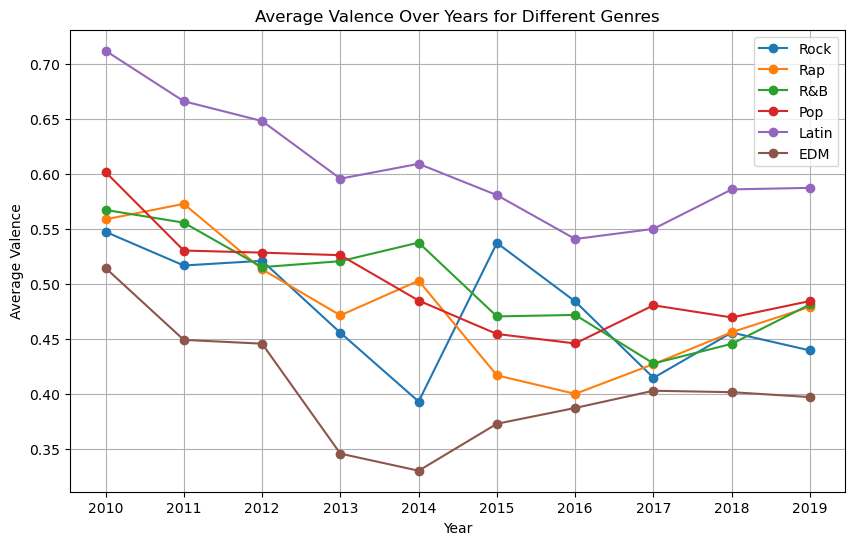

In [186]:
plt.figure(figsize=(10, 6))
plt.plot(rock_average_valence_per_year.index, rock_average_valence_per_year.values, marker='o', linestyle='-', label='Rock')

# Plot rap genre
plt.plot(rap_average_valence_per_year.index, rap_average_valence_per_year.values, marker='o', linestyle='-', label='Rap')

# Plot R&B genre
plt.plot(rnb_average_valence_per_year.index, rnb_average_valence_per_year.values, marker='o', linestyle='-', label='R&B')

plt.plot(pop_average_valence_per_year.index, pop_average_valence_per_year.values, marker='o', linestyle='-', label='Pop')

plt.plot(latin_average_valence_per_year.index, latin_average_valence_per_year.values, marker='o', linestyle='-', label='Latin')

plt.plot(edm_average_valence_per_year.index, edm_average_valence_per_year.values, marker='o', linestyle='-', label='EDM')

plt.title('Average Valence Over Years for Different Genres')
plt.xlabel('Year')
plt.ylabel('Average Valence')
plt.grid(True)
plt.xticks(range(2010, 2020))  # Ensure all years are displayed on x-axis
plt.legend()
plt.show()

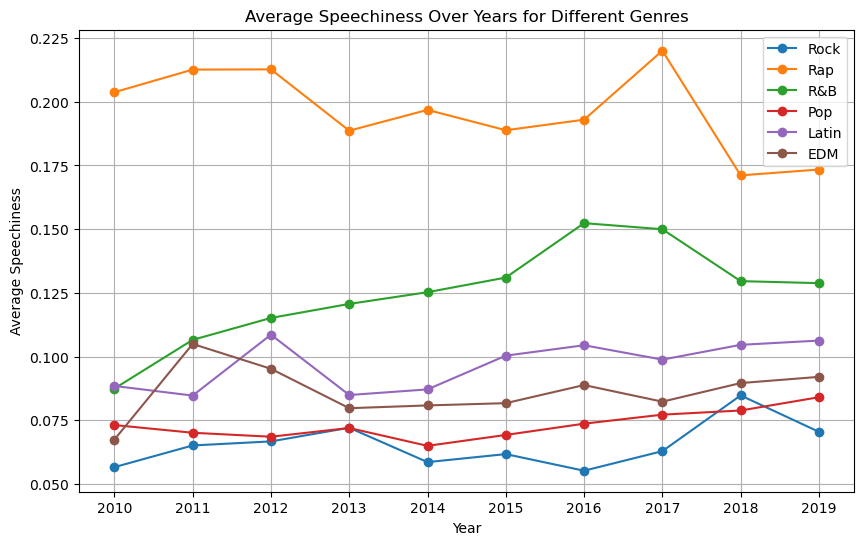

In [188]:
plt.figure(figsize=(10, 6))
plt.plot(rock_average_speechiness_per_year.index, rock_average_speechiness_per_year.values, marker='o', linestyle='-', label='Rock')

# Plot rap genre
plt.plot(rap_average_speechiness_per_year.index, rap_average_speechiness_per_year.values, marker='o', linestyle='-', label='Rap')

# Plot R&B genre
plt.plot(rnb_average_speechiness_per_year.index, rnb_average_speechiness_per_year.values, marker='o', linestyle='-', label='R&B')

plt.plot(pop_average_speechiness_per_year.index, pop_average_speechiness_per_year.values, marker='o', linestyle='-', label='Pop')

plt.plot(latin_average_speechiness_per_year.index, latin_average_speechiness_per_year.values, marker='o', linestyle='-', label='Latin')

plt.plot(edm_average_speechiness_per_year.index, edm_average_speechiness_per_year.values, marker='o', linestyle='-', label='EDM')

plt.title('Average Speechiness Over Years for Different Genres')
plt.xlabel('Year')
plt.ylabel('Average Speechiness')
plt.grid(True)
plt.xticks(range(2010, 2020))  # Ensure all years are displayed on x-axis
plt.legend()
plt.show()

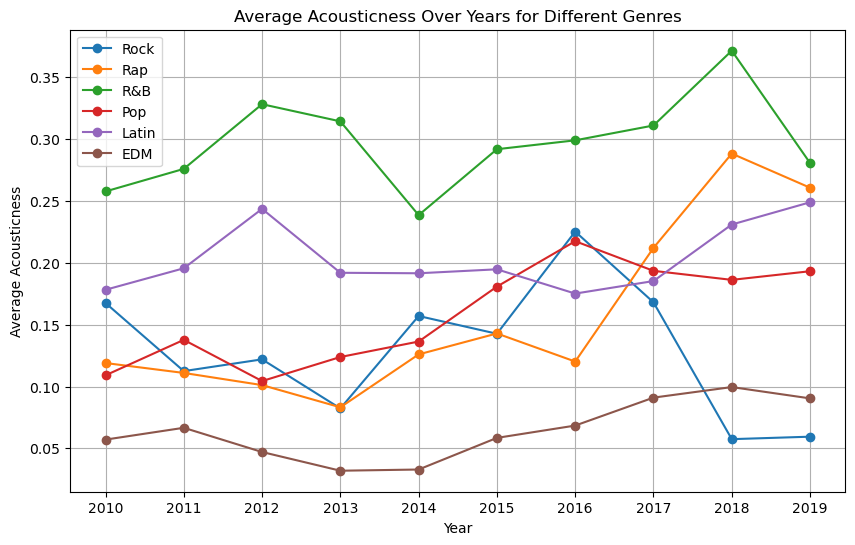

In [189]:
plt.figure(figsize=(10, 6))
plt.plot(rock_average_acousticness_per_year.index, rock_average_acousticness_per_year.values, marker='o', linestyle='-', label='Rock')

# Plot rap genre
plt.plot(rap_average_acousticness_per_year.index, rap_average_acousticness_per_year.values, marker='o', linestyle='-', label='Rap')

# Plot R&B genre
plt.plot(rnb_average_acousticness_per_year.index, rnb_average_acousticness_per_year.values, marker='o', linestyle='-', label='R&B')

plt.plot(pop_average_acousticness_per_year.index, pop_average_acousticness_per_year.values, marker='o', linestyle='-', label='Pop')

plt.plot(latin_average_acousticness_per_year.index, latin_average_acousticness_per_year.values, marker='o', linestyle='-', label='Latin')

plt.plot(edm_average_acousticness_per_year.index, edm_average_acousticness_per_year.values, marker='o', linestyle='-', label='EDM')

plt.title('Average Acousticness Over Years for Different Genres')
plt.xlabel('Year')
plt.ylabel('Average Acousticness')
plt.grid(True)
plt.xticks(range(2010, 2020))  # Ensure all years are displayed on x-axis
plt.legend()
plt.show()

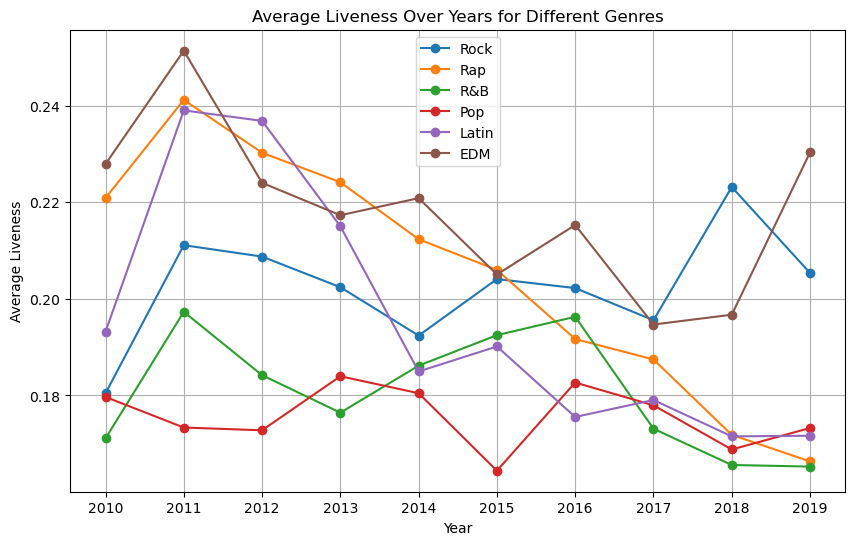

In [191]:
plt.figure(figsize=(10, 6))
plt.plot(rock_average_liveness_per_year.index, rock_average_liveness_per_year.values, marker='o', linestyle='-', label='Rock')

# Plot rap genre
plt.plot(rap_average_liveness_per_year.index, rap_average_liveness_per_year.values, marker='o', linestyle='-', label='Rap')

# Plot R&B genre
plt.plot(rnb_average_liveness_per_year.index, rnb_average_liveness_per_year.values, marker='o', linestyle='-', label='R&B')

plt.plot(pop_average_liveness_per_year.index, pop_average_liveness_per_year.values, marker='o', linestyle='-', label='Pop')

plt.plot(latin_average_liveness_per_year.index, latin_average_liveness_per_year.values, marker='o', linestyle='-', label='Latin')

plt.plot(edm_average_liveness_per_year.index, edm_average_liveness_per_year.values, marker='o', linestyle='-', label='EDM')

plt.title('Average Liveness Over Years for Different Genres')
plt.xlabel('Year')
plt.ylabel('Average Liveness')
plt.grid(True)
plt.xticks(range(2010, 2020))  # Ensure all years are displayed on x-axis
plt.legend()
plt.show()

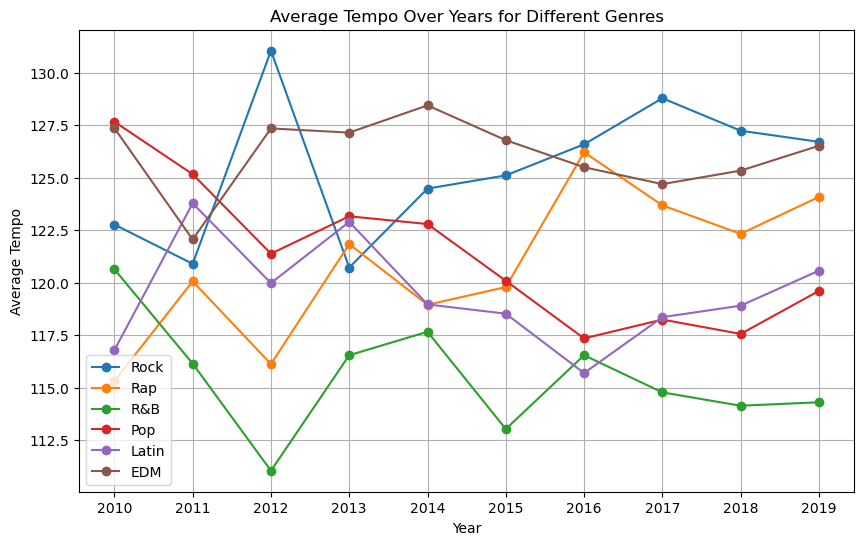

In [195]:
plt.figure(figsize=(10, 6))
plt.plot(rock_average_tempo_per_year.index, rock_average_tempo_per_year.values, marker='o', linestyle='-', label='Rock')

# Plot rap genre
plt.plot(rap_average_tempo_per_year.index, rap_average_tempo_per_year.values, marker='o', linestyle='-', label='Rap')

# Plot R&B genre
plt.plot(rnb_average_tempo_per_year.index, rnb_average_tempo_per_year.values, marker='o', linestyle='-', label='R&B')

plt.plot(pop_average_tempo_per_year.index, pop_average_tempo_per_year.values, marker='o', linestyle='-', label='Pop')

plt.plot(latin_average_tempo_per_year.index, latin_average_tempo_per_year.values, marker='o', linestyle='-', label='Latin')

plt.plot(edm_average_tempo_per_year.index, edm_average_tempo_per_year.values, marker='o', linestyle='-', label='EDM')

plt.title('Average Tempo Over Years for Different Genres')
plt.xlabel('Year')
plt.ylabel('Average Tempo')
plt.grid(True)
plt.xticks(range(2010, 2020))  # Ensure all years are displayed on x-axis
plt.legend()
plt.show()

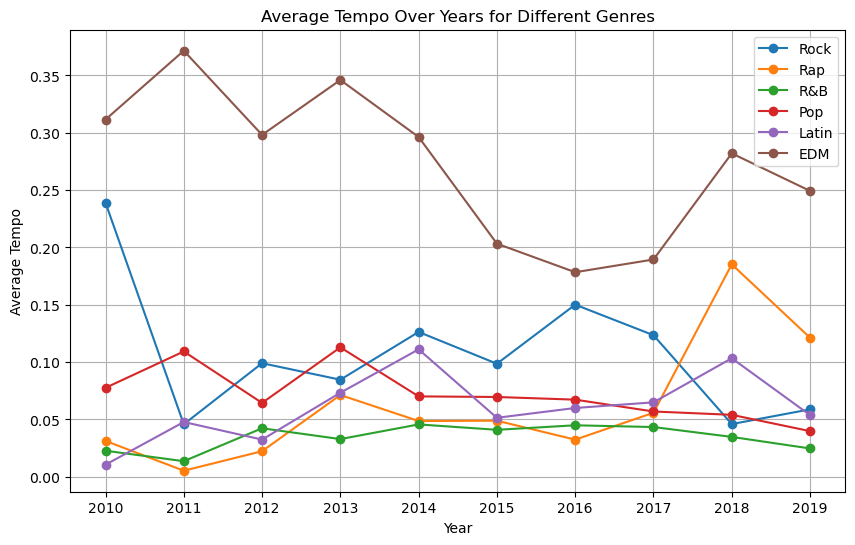

In [198]:
plt.figure(figsize=(10, 6))
plt.plot(rock_average_instrumentalness_per_year.index, rock_average_instrumentalness_per_year.values, marker='o', linestyle='-', label='Rock')

# Plot rap genre
plt.plot(rap_average_instrumentalness_per_year.index, rap_average_instrumentalness_per_year.values, marker='o', linestyle='-', label='Rap')

# Plot R&B genre
plt.plot(rnb_average_instrumentalness_per_year.index, rnb_average_instrumentalness_per_year.values, marker='o', linestyle='-', label='R&B')

plt.plot(pop_average_instrumentalness_per_year.index, pop_average_instrumentalness_per_year.values, marker='o', linestyle='-', label='Pop')

plt.plot(latin_average_instrumentalness_per_year.index, latin_average_instrumentalness_per_year.values, marker='o', linestyle='-', label='Latin')

plt.plot(edm_average_instrumentalness_per_year.index, edm_average_instrumentalness_per_year.values, marker='o', linestyle='-', label='EDM')

plt.title('Average Instrumentalness Over Years for Different Genres')
plt.xlabel('Year')
plt.ylabel('Average Instrumentalness')
plt.grid(True)
plt.xticks(range(2010, 2020))  # Ensure all years are displayed on x-axis
plt.legend()
plt.show()

In [92]:
edm_df.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
26790,366S9c0rQtvrkclcCSRNmB,"Disease - KATFYR ""Tokyo Bound"" Remix",Naeleck,43,4s3VdQXA9G1RA2a4RrCCKN,Disease,2013-09-16,Electro House 2020,317O0e8iWJLClLGDKtieRe,edm,...,0,-3.307,1,0.0456,0.002980,0.507,0.3370,0.108,128.014,288867
26791,0nEeyKLtk5vTlbcdvgrCOH,Infinite Ammo,Le Castle Vania,46,3AdNvHp7wzEBY0DYz8Oiq6,Payday,2015-10-23,Electro House 2020,317O0e8iWJLClLGDKtieRe,edm,...,7,-1.940,0,0.0627,0.000094,0.890,0.3250,0.144,127.016,232637
26792,4gxukDJiwApNEgVIh4pHgT,WOW,Tiësto,10,4I2qcrUxk37AoJOMjiOCvu,WOW,2018-08-24,Electro House 2020,317O0e8iWJLClLGDKtieRe,edm,...,6,-3.016,1,0.3370,0.001160,0.520,0.1240,0.192,127.958,148125
26793,3mLLlN1ZdHmlJHkvNON7ou,Threnody - Bombs Away Remix,Naeleck,50,2CUUZuC9EhMcnU7zdNWWrI,Threnody,2016-12-26,Electro House 2020,317O0e8iWJLClLGDKtieRe,edm,...,2,-3.728,1,0.0495,0.000389,0.320,0.2030,0.148,127.977,247309
26794,17NCISfYJl0GITXs8G75Ae,Loudness War,Fukkk Offf,33,0vXDfJsurQa6rZayRwvgtQ,Loudness War,2019-07-12,Electro House 2020,317O0e8iWJLClLGDKtieRe,edm,...,2,-4.779,1,0.0749,0.000609,0.166,0.0458,0.727,127.980,285000


In [164]:
edm_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4307 entries, 26790 to 32832
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   track_id                  4307 non-null   object        
 1   track_name                4307 non-null   object        
 2   track_artist              4307 non-null   object        
 3   track_popularity          4307 non-null   int64         
 4   track_album_id            4307 non-null   object        
 5   track_album_name          4307 non-null   object        
 6   track_album_release_date  4307 non-null   datetime64[ns]
 7   playlist_name             4307 non-null   object        
 8   playlist_id               4307 non-null   object        
 9   playlist_genre            4307 non-null   object        
 10  playlist_subgenre         4307 non-null   object        
 11  danceability              4307 non-null   float64       
 12  energy              

In [165]:
latin_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2963 entries, 16204 to 21354
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   track_id                  2963 non-null   object        
 1   track_name                2963 non-null   object        
 2   track_artist              2963 non-null   object        
 3   track_popularity          2963 non-null   int64         
 4   track_album_id            2963 non-null   object        
 5   track_album_name          2963 non-null   object        
 6   track_album_release_date  2963 non-null   datetime64[ns]
 7   playlist_name             2963 non-null   object        
 8   playlist_id               2963 non-null   object        
 9   playlist_genre            2963 non-null   object        
 10  playlist_subgenre         2963 non-null   object        
 11  danceability              2963 non-null   float64       
 12  energy              

In [167]:
pop_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3962 entries, 0 to 5506
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   track_id                  3962 non-null   object        
 1   track_name                3962 non-null   object        
 2   track_artist              3962 non-null   object        
 3   track_popularity          3962 non-null   int64         
 4   track_album_id            3962 non-null   object        
 5   track_album_name          3962 non-null   object        
 6   track_album_release_date  3962 non-null   datetime64[ns]
 7   playlist_name             3962 non-null   object        
 8   playlist_id               3962 non-null   object        
 9   playlist_genre            3962 non-null   object        
 10  playlist_subgenre         3962 non-null   object        
 11  danceability              3962 non-null   float64       
 12  energy                   

In [168]:
rnb_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2443 entries, 21378 to 26787
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   track_id                  2443 non-null   object        
 1   track_name                2443 non-null   object        
 2   track_artist              2443 non-null   object        
 3   track_popularity          2443 non-null   int64         
 4   track_album_id            2443 non-null   object        
 5   track_album_name          2443 non-null   object        
 6   track_album_release_date  2443 non-null   datetime64[ns]
 7   playlist_name             2443 non-null   object        
 8   playlist_id               2443 non-null   object        
 9   playlist_genre            2443 non-null   object        
 10  playlist_subgenre         2443 non-null   object        
 11  danceability              2443 non-null   float64       
 12  energy              

In [169]:
rap_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3734 entries, 5508 to 11252
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   track_id                  3734 non-null   object        
 1   track_name                3734 non-null   object        
 2   track_artist              3734 non-null   object        
 3   track_popularity          3734 non-null   int64         
 4   track_album_id            3734 non-null   object        
 5   track_album_name          3734 non-null   object        
 6   track_album_release_date  3734 non-null   datetime64[ns]
 7   playlist_name             3734 non-null   object        
 8   playlist_id               3734 non-null   object        
 9   playlist_genre            3734 non-null   object        
 10  playlist_subgenre         3734 non-null   object        
 11  danceability              3734 non-null   float64       
 12  energy               

In [170]:
rock_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1264 entries, 11254 to 16184
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   track_id                  1264 non-null   object        
 1   track_name                1264 non-null   object        
 2   track_artist              1264 non-null   object        
 3   track_popularity          1264 non-null   int64         
 4   track_album_id            1264 non-null   object        
 5   track_album_name          1264 non-null   object        
 6   track_album_release_date  1264 non-null   datetime64[ns]
 7   playlist_name             1264 non-null   object        
 8   playlist_id               1264 non-null   object        
 9   playlist_genre            1264 non-null   object        
 10  playlist_subgenre         1264 non-null   object        
 11  danceability              1264 non-null   float64       
 12  energy              

In [63]:
column_name = 'speechiness'
for index, row in edm_df.iterrows():
    column_values = edm_df[column_name]
    max_value = column_values.max()
    min_value = column_values.min()
    avg_value = column_values.mean()

print(f"Row {index}: Max = {max_value}, Min = {min_value}, Average = {avg_value}")

Row 32808: Max = 0.484, Min = 0.0259, Average = 0.08146548748921484


In [64]:
column_name = 'acousticness'
for index, row in edm_df.iterrows():
    column_values = edm_df[column_name]
    max_value = column_values.max()
    min_value = column_values.min()
    avg_value = column_values.mean()

print(f"Row {index}: Max = {max_value}, Min = {min_value}, Average = {avg_value}")

Row 32808: Max = 0.932, Min = 4.1e-05, Average = 0.10064314227782574


In [65]:
column_name = 'instrumentalness'
for index, row in edm_df.iterrows():
    column_values = edm_df[column_name]
    max_value = column_values.max()
    min_value = column_values.min()
    avg_value = column_values.mean()

print(f"Row {index}: Max = {max_value}, Min = {min_value}, Average = {avg_value}")

Row 32808: Max = 0.962, Min = 0.0, Average = 0.04489418826972606


In [66]:
column_name = 'valence'
for index, row in edm_df.iterrows():
    column_values = edm_df[column_name]
    max_value = column_values.max()
    min_value = column_values.min()
    avg_value = column_values.mean()

print(f"Row {index}: Max = {max_value}, Min = {min_value}, Average = {avg_value}")

Row 32808: Max = 0.969, Min = 0.0329, Average = 0.4131798101811907


In [67]:
column_name = 'tempo'
for index, row in edm_df.iterrows():
    column_values = edm_df[column_name]
    max_value = column_values.max()
    min_value = column_values.min()
    avg_value = column_values.mean()

print(f"Row {index}: Max = {max_value}, Min = {min_value}, Average = {avg_value}")

Row 32808: Max = 203.357, Min = 68.729, Average = 123.41167385677308


In [68]:
column_name = 'duration_ms'
for index, row in edm_df.iterrows():
    column_values = edm_df[column_name]
    max_value = column_values.max()
    min_value = column_values.min()
    avg_value = column_values.mean()

print(f"Row {index}: Max = {max_value}, Min = {min_value}, Average = {avg_value}")

Row 32808: Max = 484147, Min = 105500, Average = 207829.92148403797


In [199]:

genre_list = ["pop", "edm", "latin", "r&b", "rap", "rock"]
genre_data = []

for genre in genre_list:
    speechiness = cleaned_trackid_data.loc[cleaned_trackid_data["playlist_genre"]==genre, "speechiness"]
    genre_data.append(speechiness)
    quartiles = speechiness.quantile([.25, .5, .75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"The interquartile range for {genre} is {iqr}")
    print(f"For {genre}, songs with speechiness below {lower_bound} and above {upper_bound} may be outliers")
    print("\n")

The interquartile range for pop is 0.0447
For pop, songs with speechiness below -0.03005 and above 0.14875 may be outliers


The interquartile range for edm is 0.05469999999999999
For edm, songs with speechiness below -0.03714999999999998 and above 0.18164999999999998 may be outliers


The interquartile range for latin is 0.08485000000000001
For latin, songs with speechiness below -0.08412500000000003 and above 0.25527500000000003 may be outliers


The interquartile range for r&b is 0.1447
For r&b, songs with speechiness below -0.17275 and above 0.40605 may be outliers


The interquartile range for rap is 0.20870000000000002
For rap, songs with speechiness below -0.24475000000000005 and above 0.5900500000000001 may be outliers


The interquartile range for rock is 0.042699999999999995
For rock, songs with speechiness below -0.028349999999999993 and above 0.14245 may be outliers




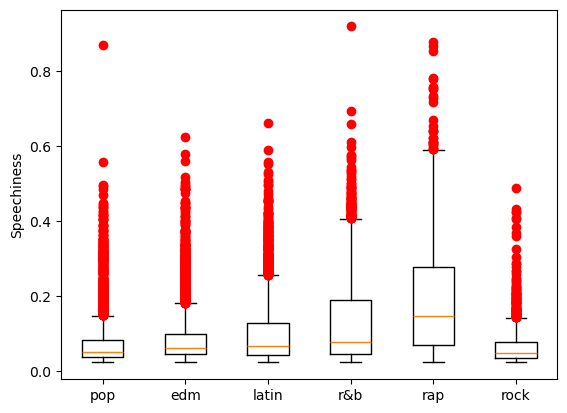

In [200]:
fig, ax1 = plt.subplots()
ax1.set_ylabel('Speechiness')
ax1.boxplot(genre_data, sym = "r")
#label the x axis
ax1.set_xticklabels(genre_list)
plt.show()

#later assess the genres of each playlist, which playlists had the most songs

In [201]:

acoustic_data = []
for genre in genre_list:
    acousticness = cleaned_trackid_data.loc[cleaned_trackid_data["playlist_genre"]==genre, "acousticness"]
    acoustic_data.append(acousticness)
    quartiles = acousticness.quantile([.25, .5, .75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"The interquartile range for {genre} is {iqr}")
    print(f"For {genre}, songs with acousticness below {lower_bound} and above {upper_bound} may be outliers")
    print("\n")

The interquartile range for pop is 0.2347
For pop, songs with acousticness below -0.33375 and above 0.60505 may be outliers


The interquartile range for edm is 0.0739125
For edm, songs with acousticness below -0.10760625000000001 and above 0.18804375 may be outliers


The interquartile range for latin is 0.28450000000000003
For latin, songs with acousticness below -0.3807500000000001 and above 0.7572500000000001 may be outliers


The interquartile range for r&b is 0.4301
For r&b, songs with acousticness below -0.57925 and above 1.14115 may be outliers


The interquartile range for rap is 0.2957
For rap, songs with acousticness below -0.40325 and above 0.77955 may be outliers


The interquartile range for rock is 0.087327
For rock, songs with acousticness below -0.13066750000000002 and above 0.21864050000000002 may be outliers




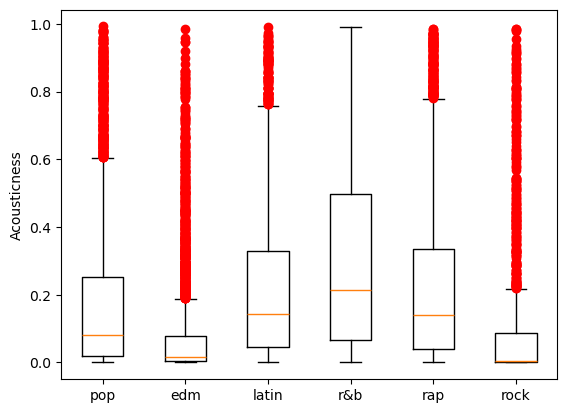

In [202]:
fig, ax1 = plt.subplots()
ax1.set_ylabel('Acousticness')
ax1.boxplot(acoustic_data, sym = "r")
#label the x axis
ax1.set_xticklabels(genre_list)
plt.show()
#figure out why the y acis isn't showing multiple colors

In [203]:
instrumental_data = []
for genre in genre_list:
    instrumentalness = cleaned_trackid_data.loc[cleaned_trackid_data["playlist_genre"]==genre, "instrumentalness"]
    instrumental_data.append(instrumentalness)
    quartiles = instrumentalness.quantile([.25, .5, .75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"The interquartile range for {genre} is {iqr}")
    print(f"For {genre}, songs with instrumentalness below {lower_bound} and above {upper_bound} may be outliers")
    print("\n")

The interquartile range for pop is 0.00297
For pop, songs with instrumentalness below -0.004455 and above 0.007424999999999999 may be outliers


The interquartile range for edm is 0.555978375
For edm, songs with instrumentalness below -0.8339459375 and above 1.3899675625 may be outliers


The interquartile range for latin is 0.0007715
For latin, songs with instrumentalness below -0.00115725 and above 0.0019287500000000001 may be outliers


The interquartile range for r&b is 0.000602
For r&b, songs with instrumentalness below -0.0009029999999999999 and above 0.0015049999999999998 may be outliers


The interquartile range for rap is 0.0006360000000000001
For rap, songs with instrumentalness below -0.0009540000000000001 and above 0.0015900000000000003 may be outliers


The interquartile range for rock is 0.029248495
For rock, songs with instrumentalness below -0.0438712375 and above 0.0731227425 may be outliers




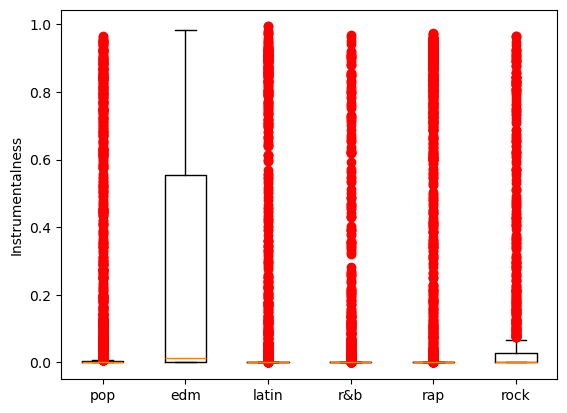

In [204]:
fig, ax1 = plt.subplots()
ax1.set_ylabel('Instrumentalness')
ax1.boxplot(instrumental_data, sym = "r")
#label the x axis
ax1.set_xticklabels(genre_list)
plt.show()

In [116]:
valence_data = []
for genre in genre_list:
    valence = cleaned_trackid_data.loc[cleaned_trackid_data["playlist_genre"]==genre, "valence"]
    valence_data.append(valence)
    quartiles = valence.quantile([.25, .5, .75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"The interquartile range for {genre} is {iqr}")
    print(f"For {genre}, songs with valence below {lower_bound} and above {upper_bound} may be outliers")
    print("\n")

The interquartile range for pop is 0.325
For pop, songs with valence below -0.14950000000000002 and above 1.1505 may be outliers


The interquartile range for edm is 0.3400000000000001
For edm, songs with valence below -0.29400000000000015 and above 1.0660000000000003 may be outliers


The interquartile range for latin is 0.339
For latin, songs with valence below -0.06750000000000006 and above 1.2885 may be outliers


The interquartile range for r&b is 0.352
For r&b, songs with valence below -0.18100000000000005 and above 1.2269999999999999 may be outliers


The interquartile range for rap is 0.34800000000000003
For rap, songs with valence below -0.194 and above 1.198 may be outliers


The interquartile range for rock is 0.359
For rock, songs with valence below -0.1845 and above 1.2515 may be outliers




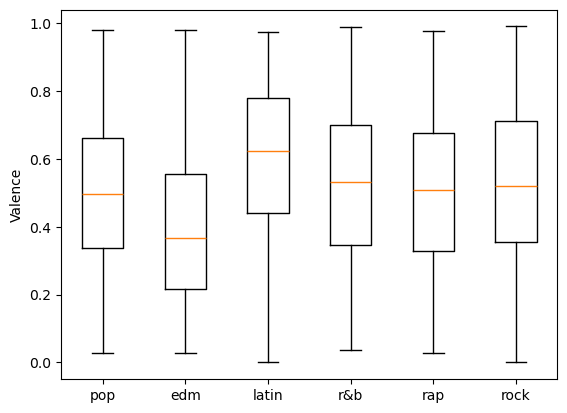

In [205]:
fig, ax1 = plt.subplots()
ax1.set_ylabel('Valence')
ax1.boxplot(valence_data, sym = "r")
#label the x axis
ax1.set_xticklabels(genre_list)
plt.show()

In [206]:
tempo_data = []
for genre in genre_list:
    tempo = cleaned_trackid_data.loc[cleaned_trackid_data["playlist_genre"]==genre, "tempo"]
    tempo_data.append(tempo)
    quartiles = tempo.quantile([.25, .5, .75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"The interquartile range for {genre} is {iqr}")
    print(f"For {genre}, songs with tempo below {lower_bound} and above {upper_bound} may be outliers")
    print("\n")

The interquartile range for pop is 27.94874999999999
For pop, songs with tempo below 60.092125000000024 and above 171.88712499999997 may be outliers


The interquartile range for edm is 4.154749999999993
For edm, songs with tempo below 117.64712500000002 and above 134.266125 may be outliers


The interquartile range for latin is 31.067000000000007
For latin, songs with tempo below 50.456999999999994 and above 174.72500000000002 may be outliers


The interquartile range for r&b is 40.667
For r&b, songs with tempo below 30.9405 and above 193.6085 may be outliers


The interquartile range for rap is 50.34025
For rap, songs with tempo below 19.328874999999996 and above 220.68987499999997 may be outliers


The interquartile range for rock is 44.19
For rock, songs with tempo below 35.60900000000001 and above 212.369 may be outliers




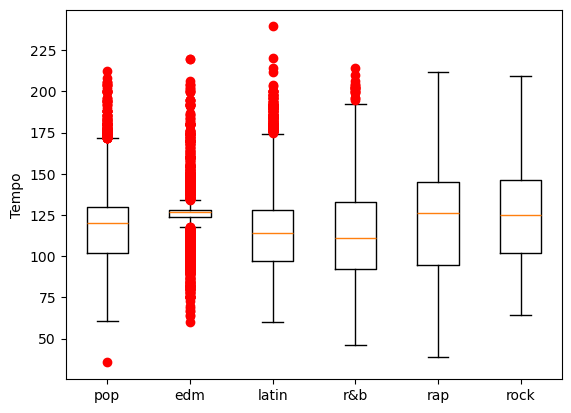

In [207]:
fig, ax1 = plt.subplots()
ax1.set_ylabel('Tempo')
ax1.boxplot(tempo_data, sym = "r")
#label the x axis
ax1.set_xticklabels(genre_list)
plt.show()

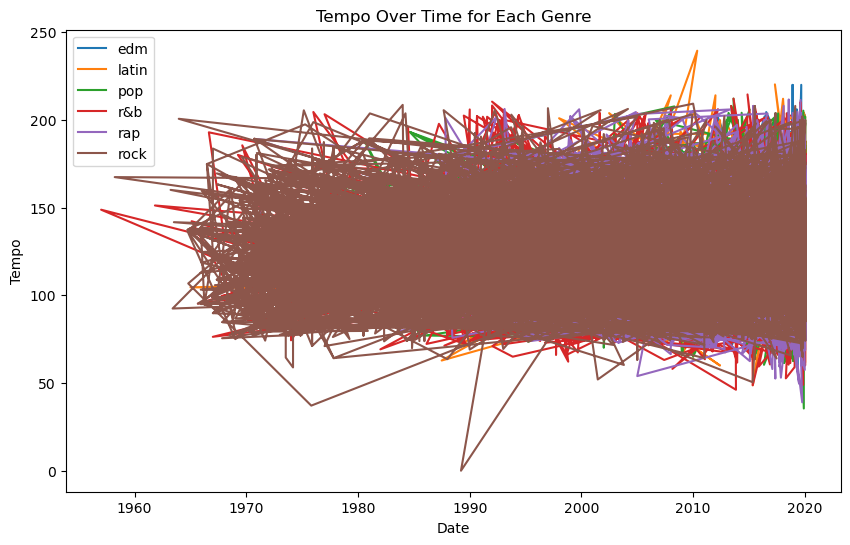